## Ordinal Classification using logistic regression
### Model Training

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn2pmml import sklearn2pmml
from sklearn2pmml import ColumnTransformer
from sklearn2pmml.pipeline import PMMLPipeline

In [19]:
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [20]:
# Data Import
df = pd.read_csv('../../../../data/winequality-white-cleaned.csv',sep=';')
# Get features and target
x = df.drop('target', axis=1)
y = df[['target']]

## Data Transformation

In [21]:
# Selecting categorical and numeric features
sel_numeric = make_column_selector(dtype_include=np.number)
x_numerical = sel_numeric(x)

sel_categorical = make_column_selector(dtype_exclude=np.number)
x_categorical = sel_categorical(x)

In [22]:
# Create preprocessing pipelines for numerical features
trans_numerical = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())]
)

In [23]:
# Create preprocessing pipelines for categorical features
trans_categorical = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder()),
    ('scaler', StandardScaler())]
)

In [24]:
# Putting the preprocessing steps together
transformer = ColumnTransformer([
    # ('categorical', trans_categorical, x_categorical),
    ('numerical', trans_numerical, x_numerical)],
remainder='passthrough'
)

## Model Training

In [25]:
# Data Split
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size=0.2)
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

## Multinomial Logistic Regression

In [26]:
# Create pipeline with logistic regression as classifier
pipeline = PMMLPipeline(steps=[
    ('transformer', transformer),
    ('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000))
])

pipeline.fit(x_train, y_train)
pipeline.verify(x_train.sample(n = 10))

In [29]:
y_pred = pipeline.predict(x_test)
y_pred.view()

array([9, 4, 4, ..., 9, 7, 4])

## Measure Model Performance

In [30]:
print(f'The model accuracy is: {np.round(accuracy_score(y_test, y_pred), decimals=3)*100}%')

The model accuracy is: 67.30000000000001%


In [31]:
print(f'The model f1 score is: {np.round(f1_score(y_test, y_pred, average="""weighted"""), decimals=3)*100}%')

The model f1 score is: 65.60000000000001%


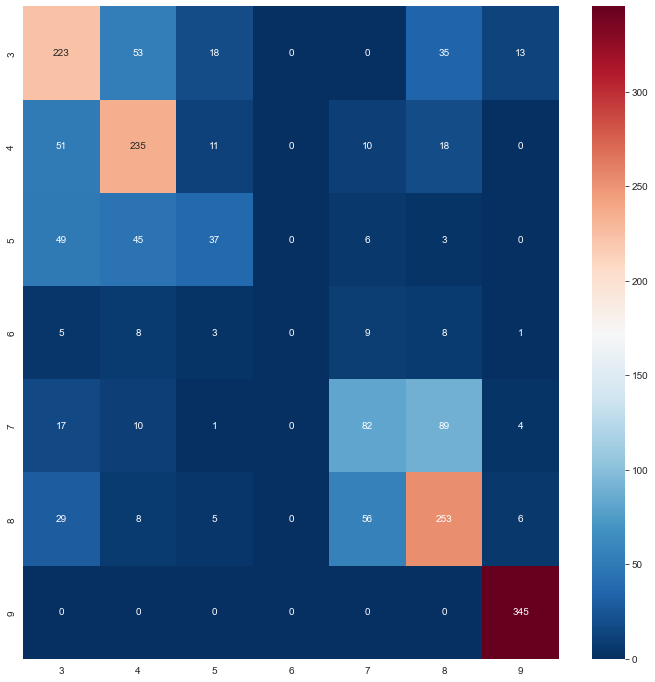

In [32]:
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
plt.figure(figsize=(12, 12))
cmap = sns.color_palette("Oranges",12)
sns.heatmap(data=cm, cmap="RdBu_r", xticklabels=pipeline.classes_, yticklabels=pipeline.classes_, fmt='g', annot=True)
plt.show()

As we can observer, the diagonal value is the highest value for each row which means we have a good classifier.

## Save the mode

In [33]:
sklearn2pmml(pipeline, "../../../../data/OrdinalLogisticRegression.pmml")